**UNIVERSIDADE DE SÃO PAULO (USP)**

**_Author_**: Carlos Filipe de Castro Lemos

**_Academic Study_**: Generic Data Transformation - Scaling

* Scaling Numerical Data
* Scaling Categorical Data

# Loading Packages

In [436]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [437]:
df = pd.read_csv('./data/03transformed.csv')

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  998 non-null    int64  
 1   id          998 non-null    int64  
 2   score       998 non-null    int64  
 3   state       998 non-null    object 
 4   gender      998 non-null    object 
 5   age         998 non-null    int64  
 6   patrimony   998 non-null    int64  
 7   balance     998 non-null    int64  
 8   products    998 non-null    int64  
 9   credit      998 non-null    int64  
 10  active      998 non-null    int64  
 11  wage        998 non-null    float64
 12  leave       998 non-null    int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 101.5+ KB


In [439]:
df[['state','gender']]

,state,gender
0,RS,Feminino
1,SC,Feminino
2,RS,Feminino
3,RS,Feminino
4,SC,Feminino
...,...,...
993,SC,Masculino
994,SC,Masculino
995,SC,Masculino
996,SC,Masculino


Based on the information above, there is no order between the values ​​of the 'state' or 'gender' variables, so we must treat them. 

Furthermore, based on the analysis we did on notebook 3, we know that the data is out of scale.

So we need to fix these issues. 

**Observation**: I will use several methods to record your algorithms; but, in the end, I will store the result of just one transformation.

# Numerical Data

Let's use 'age' distribution to show the scaling.

In [440]:
d = df['age'].copy()

## Standardization

* This is the method that is responsible for transforming the data into a distribution with mean equal to zero and variance equal to one - like normal distribution: $N(\mu, \sigma^{2})$ = $N(0, 1)$.

* **Formula**:

$$X_{o} = \frac{X-\mu}{\sigma}$$

  where:
  * $X_{o}$ is the standardized observed value.
  * $\mu$ is average value of the data.
  * $\sigma$ is the standard deviation value.

In [441]:
o = pd.DataFrame(d.copy(), columns=['age'])

### Hard Coded

In [442]:
def formula(o, x):
    mean = np.mean(o['age'])
    std = np.std(o['age'])   
    return (x-mean)/std

In [443]:
o['s'] = o.apply(lambda x: formula(o, x))

### SKLearn Method

In [444]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
o['ss'] = scaler.fit_transform(o[['s']])

### Comparing

In [445]:
o

,age,s,ss
0,42,0.281871,0.281871
1,41,0.184869,0.184869
2,42,0.281871,0.281871
3,39,-0.009137,-0.009137
4,43,0.378874,0.378874
...,...,...,...
993,43,0.378874,0.378874
994,29,-0.979162,-0.979162
995,44,0.475876,0.475876
996,62,2.221921,2.221921


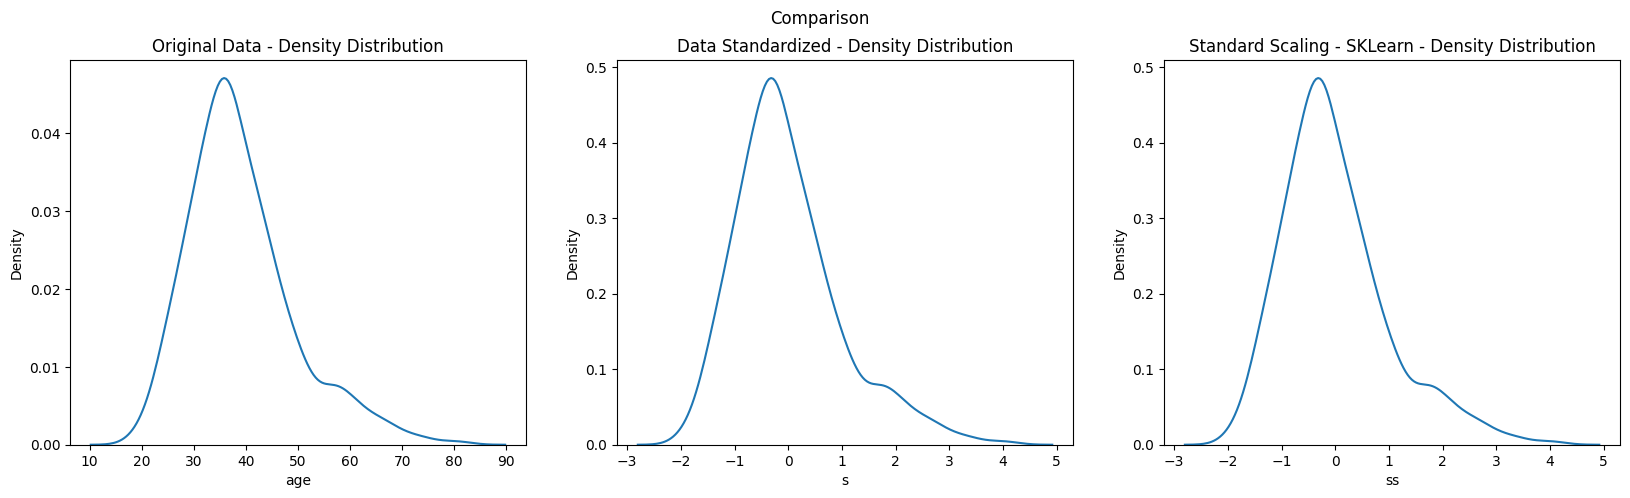

In [446]:
picture = plt.figure(figsize=(20,5))
picture.suptitle('Comparison')

picture.add_subplot(131)
sns.kdeplot(o['age'])
plt.title('Original Data - Density Distribution')

picture.add_subplot(132)
sns.kdeplot(o['s'])
plt.title('Data Standardized - Density Distribution')

picture.add_subplot(133)
sns.kdeplot(o['ss'])
plt.title('Standard Scaling - SKLearn - Density Distribution')
plt.show()

No news. It's the same method.

## MinMax Scaling

* MinMaxScaler is a technique that scales data so that it is within a specific range, usually between 0 and 1 (default), while preserving the order relationships of the data. It is especially useful when you want your data to be at a specific scale or when you are working with algorithms that are sensitive to the scale of features (for example, negative value).

* Formula:

$$X_{scaled} = \frac{X-min(X)}{max(X)-min(X)}$$ 

where:
* $X_{scaled} is the value$
* $X$ original value
* min(X) is the minimum value of the distribution
* max(X) is the maximum value of the distribution


In [447]:
o = pd.DataFrame(d.copy(), columns=['age'])

### Hard Coded

In [448]:
def formula2(x,o):
    maximum = np.max(o['age'])
    minimum = np.min(o['age'])
    return (x-minimum)/(maximum - minimum)

In [449]:
o['mms-hc'] = o.apply(lambda x: formula2(x,o))

### SKLean Method

In [450]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
o['mms'] = scaler.fit_transform(o[['age']])

### Comparison

In [451]:
o

,age,mms-hc,mms
0,42,0.375000,0.375000
1,41,0.359375,0.359375
2,42,0.375000,0.375000
3,39,0.328125,0.328125
4,43,0.390625,0.390625
...,...,...,...
993,43,0.390625,0.390625
994,29,0.171875,0.171875
995,44,0.406250,0.406250
996,62,0.687500,0.687500


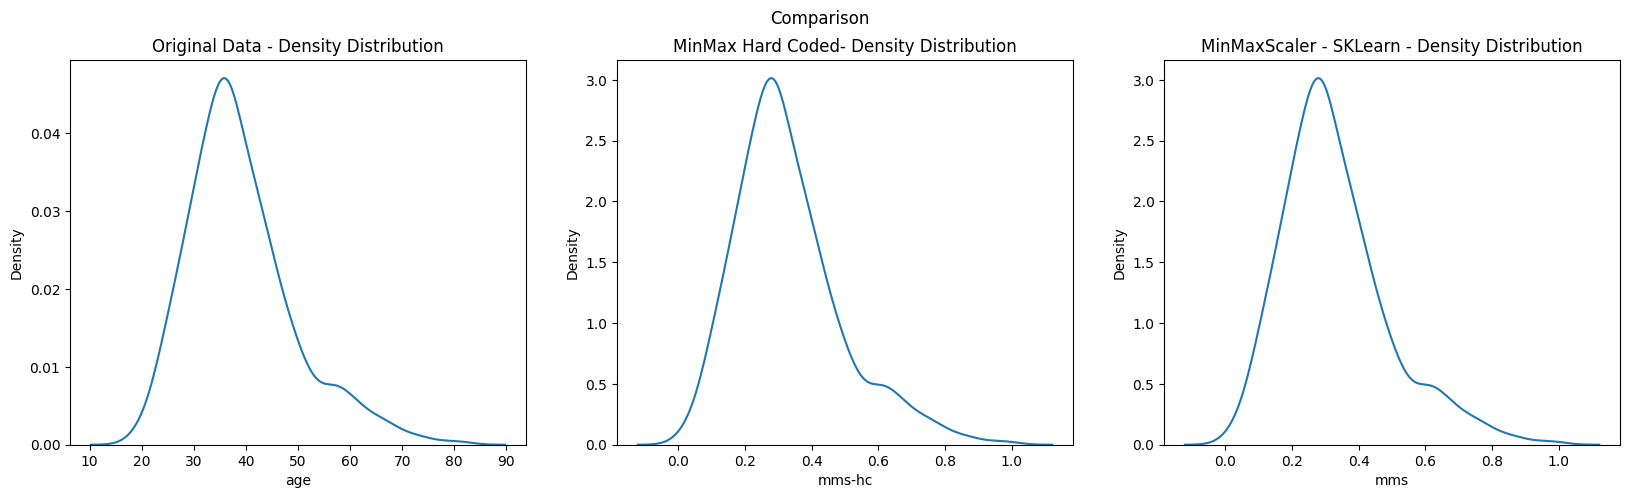

In [452]:
picture = plt.figure(figsize=(20,5))
picture.suptitle('Comparison')

picture.add_subplot(131)
sns.kdeplot(o['age'])
plt.title('Original Data - Density Distribution')

picture.add_subplot(132)
sns.kdeplot(o['mms-hc'])
plt.title('MinMax Hard Coded- Density Distribution')

picture.add_subplot(133)
sns.kdeplot(o['mms'])
plt.title('MinMaxScaler - SKLearn - Density Distribution')
plt.show()

## Robust Scaling

* Robust Scaling is a scaling technique that is robust to outliers in the data. It is similar to Standardization, but uses outlier-resistant statistics such as median and interquartile range (IQR) instead of mean and standard deviation.

* Formula:

$$X_{scaled} = \frac{X-median(X)}{IQR(X)}$$

where

* $X_{scaled}$ is the value scaled.
* X is the original value.
* median(X) is the value of median of the distribution.
* IQR(X) is the InterQuatile Range (IQR) os the variable values.

In [453]:
o = pd.DataFrame(d.copy(), columns=['age'])

### Hard Coded

In [454]:
def formula3(x, o):
    
    sorted_o = o['age'].sort_values()
    median = np.percentile(sorted_o, 50)
    Q1 = np.percentile(sorted_o, 25)
    Q3 = np.percentile(sorted_o, 75)
    IQR = Q3 - Q1

    return (x-median)/IQR


In [455]:
o['rs-hc'] = o.apply(lambda x: formula3(x, o))

### SKLearn Method

In [456]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
o['rs'] = scaler.fit_transform(o[['age']])

### Comparison

In [457]:
o

,age,rs-hc,rs
0,42,0.416667,0.416667
1,41,0.333333,0.333333
2,42,0.416667,0.416667
3,39,0.166667,0.166667
4,43,0.500000,0.500000
...,...,...,...
993,43,0.500000,0.500000
994,29,-0.666667,-0.666667
995,44,0.583333,0.583333
996,62,2.083333,2.083333


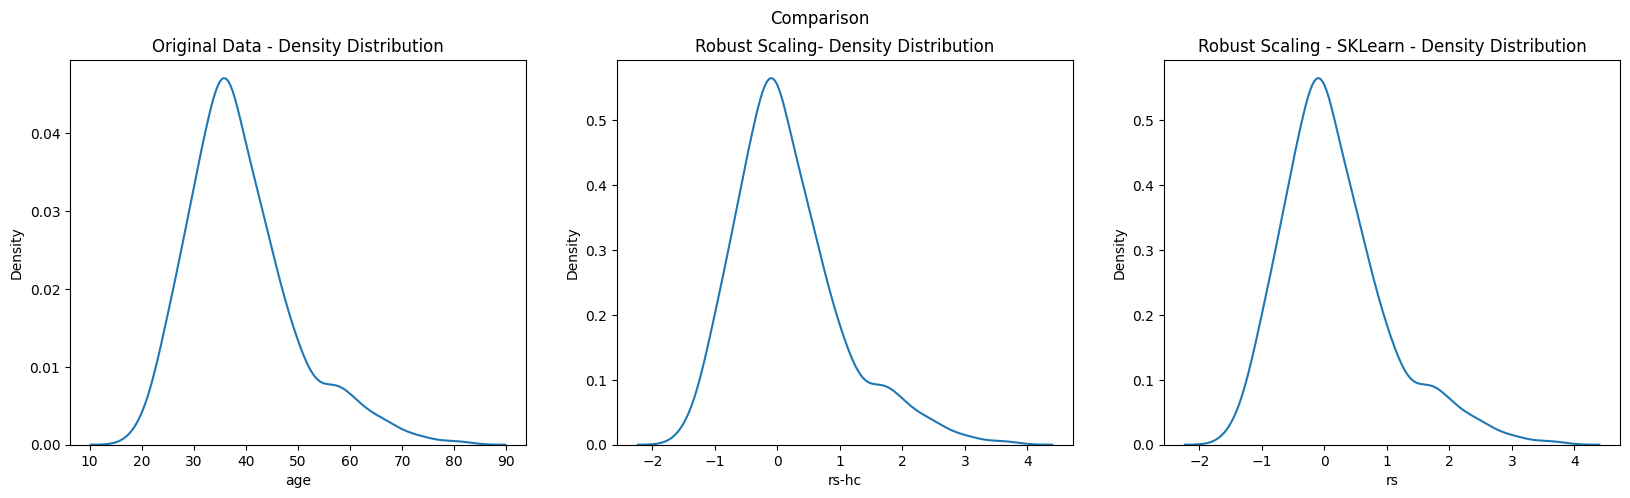

In [458]:
picture = plt.figure(figsize=(20,5))
picture.suptitle('Comparison')

picture.add_subplot(131)
sns.kdeplot(o['age'])
plt.title('Original Data - Density Distribution')

picture.add_subplot(132)
sns.kdeplot(o['rs-hc'])
plt.title('Robust Scaling- Density Distribution')

picture.add_subplot(133)
sns.kdeplot(o['rs'])
plt.title('Robust Scaling - SKLearn - Density Distribution')
plt.show()

## Max AbsScaler

MaxAbsScaler is a scaling technique that scales feature values ​​so that the maximum absolute value in each feature is 1. It preserves data order relationships and is useful when you do not want to bias the data mean.

$$X_{scaled} = \frac{X}{max(|X|)}$$

where:

* $X_{scaled}$ is the value scaled.
* X is the original value.
* max(|X|) is the absolute maximum value of the distributiuon.

In [459]:
o = pd.DataFrame(d.copy(), columns=['age'])

### Hard Coded

In [460]:
def formula4(x, o):
    maximum = np.abs(np.max(o['age']))
    return x/maximum

In [461]:
o['mas-hc'] = o['age'].apply(lambda x: formula4(x,o))

### SKLearn Method

In [462]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
o['mas'] = scaler.fit_transform(o[['age']])

### Comparison

In [463]:
o

,age,mas-hc,mas
0,42,0.512195,0.512195
1,41,0.500000,0.500000
2,42,0.512195,0.512195
3,39,0.475610,0.475610
4,43,0.524390,0.524390
...,...,...,...
993,43,0.524390,0.524390
994,29,0.353659,0.353659
995,44,0.536585,0.536585
996,62,0.756098,0.756098


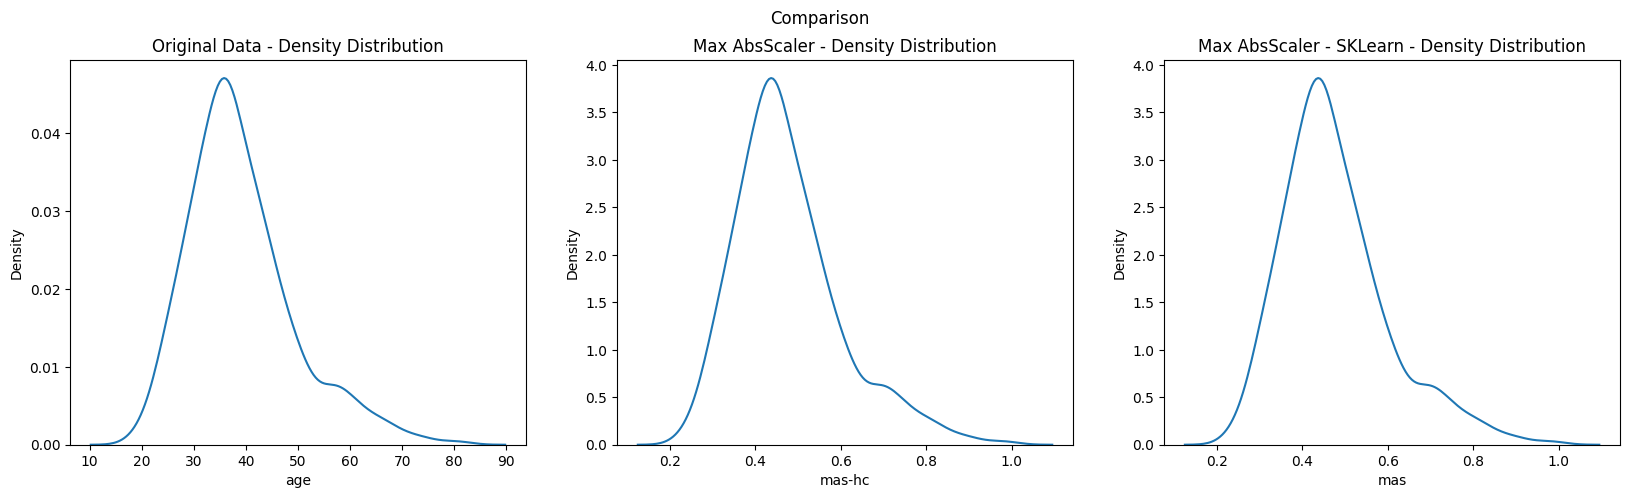

In [464]:
picture = plt.figure(figsize=(20,5))
picture.suptitle('Comparison')

picture.add_subplot(131)
sns.kdeplot(o['age'])
plt.title('Original Data - Density Distribution')

picture.add_subplot(132)
sns.kdeplot(o['mas-hc'])
plt.title('Max AbsScaler - Density Distribution')

picture.add_subplot(133)
sns.kdeplot(o['mas'])
plt.title('Max AbsScaler - SKLearn - Density Distribution')
plt.show()

## Scaler Box-Cox

* The Box-Cox method is a transformation technique that is used to make data follow a normal or near-normal distribution, making it more suitable for statistical analyzes that assume normality of the data. It's very interesting.

* **Formula**:

$$
X_{scaled}=
\begin{cases}
\frac{x^{\lambda}-1}{\lambda} & \quad \text{if $\lambda \neq 0$}\\ 
\log(x) & \quad \text{if $\lambda = 0$}
\end{cases}
$$

where:

* $X_{scaled}$ is the value rescaled.
* X is the original value.
* $\lambda$ is the transformation parameter.


In [465]:
o = pd.DataFrame(d.copy(), columns=['age'])

In [466]:
from scipy import stats

data_transformed, lambda_value = stats.boxcox(o['age'])

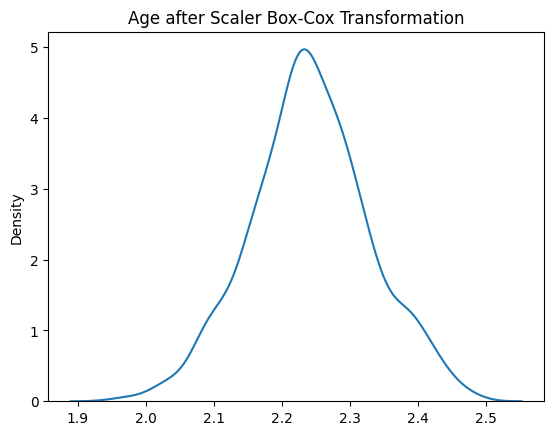

In [467]:
sns.kdeplot(data_transformed)
plt.title("Age after Scaler Box-Cox Transformation")
plt.show()

## Others

There are other types of scaling:

* Scaler Mean Absolute Deviation (MAD)
* Scaler Pareto (Principal Component Analysis)
* Scaler Rank
* Scaler Log-Cumulative Distribution

# Categorical Data

* Categorical data is treated according to its nature. So, we can classify categorical data scaling through its techniques:
  
  * **Label Encoding**: the first technique is related to the order os the relationship, such as, for example, strings that bring with them the idea of ​​first, second or third place, as well as situations in which there are levels of hierarchy - such as education levels. I simple words, we must preserve the difference between the values because it matters.
  
  * **One Hot Encoding**: in opposite direction of Label Encoding, we may found categorical variables which do not present a hierarchical relationship, as is the case with female and male. In this kind of situation, we must use the One Hot Encoding technique. 
  
  * **Binary Encoding**: in some situations, we may want to classify certain values ​​into binary values, for example, overage and underage, or yes or no, or true or false. In this case, we can use Binary Encoding.

In [468]:
df

,Unnamed: 0,id,score,state,gender,age,patrimony,balance,products,credit,active,wage,leave
0,0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
994,995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
995,996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
996,997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [469]:
o_gender = df[['gender']].copy()
o_state = df[['state']].copy()

## One Hot Encoding

### Dummies Variables

In [470]:
o_gender

,gender
0,Feminino
1,Feminino
2,Feminino
3,Feminino
4,Feminino
...,...
993,Masculino
994,Masculino
995,Masculino
996,Masculino


In [471]:
pd.get_dummies(o_gender, columns=['gender'])

,gender_Feminino,gender_Masculino
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
993,False,True
994,False,True
995,False,True
996,False,True


### One Hot Encoding - SKLearn

In [472]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
data = encoder.fit_transform(o_gender)
encoded_df = pd.DataFrame(data, columns=encoder.get_feature_names_out())
encoded_df

/home/filipe/Ambientes/DataPackages/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender_Feminino,gender_Masculino
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
993,0.0,1.0
994,0.0,1.0
995,0.0,1.0
996,0.0,1.0


## Label Encoding

I know 'state' is not ordered. But I need an example.

In [473]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
o_state['state_encoded'] = encoder.fit_transform(o_state)
o_state

/home/filipe/Ambientes/DataPackages/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,state,state_encoded
0,RS,1
1,SC,2
2,RS,1
3,RS,1
4,SC,2
...,...,...
993,SC,2
994,SC,2
995,SC,2
996,SC,2


## Binary Encoding

In [474]:
from sklearn.preprocessing import LabelBinarizer
